### Student Information
Name: Didier Fernando Salazar Estrada - 利 葉

Student ID: 111065427

GitHub ID: difersalest

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [5]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
#We start by importing our data from the text files as lists, each line corresponds to an item in the list
with open('amazon_cells_labelled.txt') as f:
    amazon = f.readlines()
with open('imdb_labelled.txt') as f:
    imdb = f.readlines()
with open('yelp_labelled.txt') as f:
    yelp = f.readlines()

#Now we want to split the corresponding data into the two categories, the sentence and its corresponding score 
amazon_sep=[]
imdb_sep=[]
yelp_sep=[]
amazon_sent=[]
imdb_sent=[]
yelp_sent=[]
amazon_score=[]
imdb_score=[]
yelp_score=[]
#We navigate into the lists, clear the data by eliminating the '\n' at the end and split into two columns following the format '\t'.
#In this way we will have from one side the sentence and in the other the score.
for x in range(len(amazon)):
    amazon_sep.append(amazon[x].removesuffix('\n').split('\t'))
    imdb_sep.append(imdb[x].removesuffix('\n').split('\t'))
    yelp_sep.append(yelp[x].removesuffix('\n').split('\t'))

#We separate the sentences and scores accordingly to create the categories later
sentences=[]
scores=[]
for x in range(len(amazon_sep)):
    amazon_sent.append(amazon_sep[x][0])
    amazon_score.append(amazon_sep[x][1])
    imdb_sent.append(imdb_sep[x][0])
    imdb_score.append(imdb_sep[x][1])
    yelp_sent.append(yelp_sep[x][0])
    yelp_score.append(yelp_sep[x][1])

#We integrate the sentences and scores accordingly from each site
sentences.extend(amazon_sent)
sentences.extend(imdb_sent)
sentences.extend(yelp_sent)
scores.extend(amazon_score)
scores.extend(imdb_score)
scores.extend(yelp_score)


#Because every sentence and score is separated each every 1000 item in the list we can create new categories, naming them for each site in that order too.
#Categories: amazon, imdb and yelp
category_name=[]
for x in range(3000):
    if x<1000:
        category_name.append('amazon')
    if x>=1000 and x<2000:
        category_name.append('imdb')
    if x>=2000 and x<3000:
        category_name.append('yelp')


In [145]:
import pandas as pd
import helpers.data_mining_helpers as dmh
#Here is the data frame, with the columns made by the sentences, scores, the category assigned and the respective name of the site where the reviews where done.
X = pd.DataFrame(sentences,columns=['Sentences'])
X['Score']=scores
X['Category_name']=category_name
X

,Sentences,Score,Category_name
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp
2996,Appetite instantly gone.,0,yelp
2997,Overall I was not impressed and would not go b...,0,yelp
2998,"The whole experience was underwhelming, and I ...",0,yelp


In [146]:
#Querying the data using different functions
print(X.loc[:10, 'Sentences'])
print(X.iloc[995:1005, 0])
print(X.reindex([1,1001,2001]))

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: Sentences, dtype: object
995     The screen does get smudged easily because it ...
996     What a piece of junk.. I lose more calls on th...
997                          Item Does Not Match Picture.
998     The only thing that disappoint me is the infra...
999     You can not answer calls with the unit, never ...
1000    A very, very, very slow-moving, aimless movie ...
1001 

In [147]:
print(X[X['Category_name']=='amazon'].iloc[::10][0:5]) #First 5 amazon sentences spacing 10 items between each of them for the query

                                            Sentences Score Category_name
0   So there is no way for me to plug it in here i...     0        amazon
10                    And the sound quality is great.     1        amazon
20  I went on Motorola's website and followed all ...     0        amazon
30  This is a simple little phone to use, but the ...     0        amazon
40  It has a great camera thats 2MP, and the pics ...     1        amazon


In [148]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1) #There are no null items in the data set

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [150]:
X_sample = X.sample(frac=0.1) #I sampled 10% of the data for the model to be trained.
X_sample

,Sentences,Score,Category_name
2280,I went to Bachi Burger on a friend's recommend...,1,yelp
2414,I can take a little bad service but the food s...,0,yelp
136,Very good stuff for the price.,1,amazon
2085,I love the Pho and the spring rolls oh so yumm...,1,yelp
1335,It was a very superficial movie and it gave me...,0,imdb
...,...,...,...
2345,Pretty good beer selection too.,1,yelp
383,After trying many many handsfree gadgets this ...,1,amazon
378,"Clear Skype Calls, Long Battery Life, Long Range.",1,amazon
47,AFTER ARGUING WITH VERIZON REGARDING THE DROPP...,0,amazon


In [152]:
#Import the related libraries to plot and do calculations
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

amazon    1000
imdb      1000
yelp      1000
Name: Category_name, dtype: int64


<AxesSubplot: title={'center': 'Total Category Distribution'}>

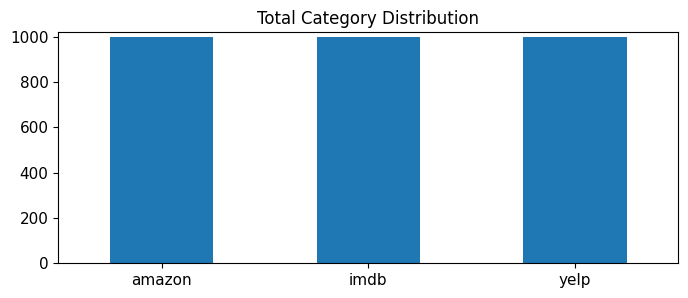

In [166]:
print(X.Category_name.value_counts()) #There are 1000 items per category (amazon, imdb and yelp) according to the general data set

# plot barchart for X
X.Category_name.value_counts().plot(kind = 'bar',
                                    title = 'Total Category Distribution',
                                    ylim = [0, max(X.Category_name.value_counts())+20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0    1500
1    1500
Name: Score, dtype: int64


<AxesSubplot: title={'center': 'Total Score Distribution'}>

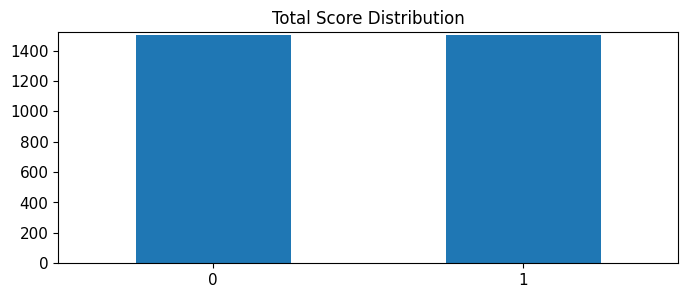

In [165]:
print(X.Score.value_counts()) #There are 500 negative and 500 positive scores (0-negative and 1-positive) according to the data set
#1500 in total making the sum for each of the category names (amazon, imdb and yelp)

# plot barchart for X
X.Score.value_counts().plot(kind = 'bar',
                                    title = 'Total Score Distribution',
                                    ylim = [0, max(X.Score.value_counts())+20],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      105
yelp      103
amazon     92
Name: Category_name, dtype: int64


<AxesSubplot: title={'center': 'Sampled Category Distribution'}>

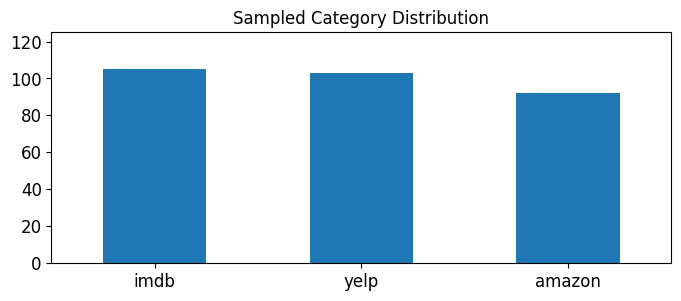

In [167]:
#We sampled 10% of the total of items, now we see how is the distribution with some graphs for the categories
# plot barchart for X_sample
print(X_sample.Category_name.value_counts())

# plot barchart for X_sample
X_sample.Category_name.value_counts().plot(kind = 'bar',
                                           title = 'Sampled Category Distribution',
                                           ylim = [0, max(X_sample.Category_name.value_counts())+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

0    159
1    141
Name: Score, dtype: int64


<AxesSubplot: title={'center': 'Sampled Score Distribution'}>

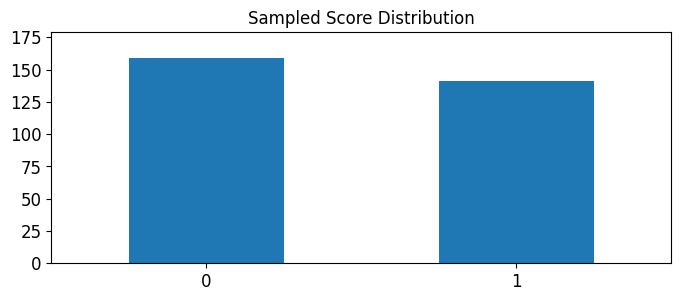

In [168]:
#We sampled 10% of the total of items, now we see how is the distribution with some graphs for the scores (0-negative and 1-positive)
# plot barchart for X_sample
print(X_sample.Score.value_counts())

# plot barchart for X_sample
X_sample.Score.value_counts().plot(kind = 'bar',
                                           title = 'Sampled Score Distribution',
                                           ylim = [0, max(X_sample.Score.value_counts())+20], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

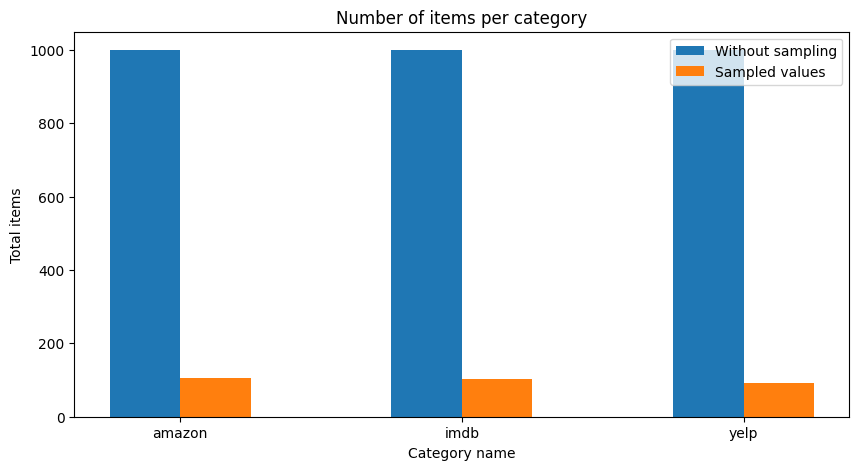

In [154]:
#There are 3 categories: amazon, imdb and yelp. Each of them in the total data set have 1000 sentences.
#Items side by side per category
# Number of bars per category
N = 3

# Position of the categories in x-axis
ind = np.arange(N)

# Graph size
plt.figure(figsize=(10,5))

# Width of the bar 
width = 0.25      

# Plotting the required graph
plt.bar(ind, X.Category_name.value_counts() , width, label='Without sampling')
plt.bar(ind + width, X_sample.Category_name.value_counts(), width, label='Sampled values')

#Labels
plt.xlabel('Category name')
plt.ylabel('Total items')
plt.title('Number of items per category')

#Bar titles
plt.xticks(ind + width / 2, (list(dict(X.Category_name.value_counts()))[0],list(dict(X.Category_name.value_counts()))[1],list(dict(X.Category_name.value_counts()))[2]))

# The legends will be put on the best position
plt.legend(loc='best')
plt.show()

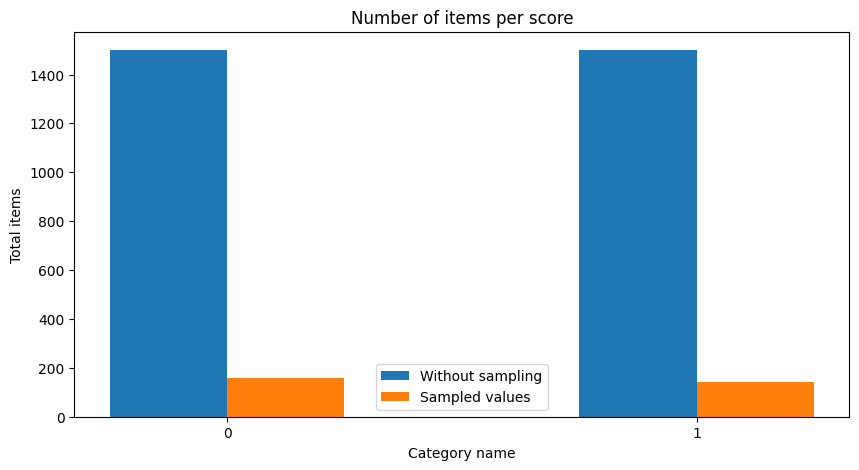

In [169]:
#There are 2 type of scores (0-negative and 1-positive) 1500 for each one in the general data set
#Items side by side per scores
# Number of bars per category
N = 2

# Position of the categories in x-axis
ind = np.arange(N)

# Graph size
plt.figure(figsize=(10,5))

# Width of the bar 
width = 0.25      

# Plotting the required graph
plt.bar(ind, X.Score.value_counts() , width, label='Without sampling')
plt.bar(ind + width, X_sample.Score.value_counts(), width, label='Sampled values')

#Labels
plt.xlabel('Category name')
plt.ylabel('Total items')
plt.title('Number of items per score')

#Bar titles
plt.xticks(ind + width / 2, (list(dict(X.Score.value_counts()))[0],list(dict(X.Score.value_counts()))[1]))

# The legends will be put on the best position
plt.legend(loc='best')
plt.show()